<a href="https://colab.research.google.com/github/ethanknights/roboflow-yolo-experiments/blob/main/Copy_of_train_YOLO9_on_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Train YOLOv9 on a Custom Dataset
---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/WongKinYiu/yolov9)
[![arXiv](https://img.shields.io/badge/arXiv-2402.13616-b31b1b.svg)](https://arxiv.org/pdf/2402.13616.pdf)

<br>

![YOLOv9 Benchmark](https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/yolov9-benchmark.jpeg)

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [7]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (325/325), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 325 (delta 165), reused 263 (delta 162), pack-reused 0
Receiving objects: 100% (325/325), 2.23 MiB | 27.57 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9/yolov9


**NOTE:** Let's install additional packages that will be useful later on.

In [8]:
!pip install -q roboflow

## Imports

In [ ]:
import roboflow

from IPython.display import Image

In [9]:
roboflow.login()

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········


## Download model weights

**NOTE:** In the YOLOv9 paper, versions yolov9-s and yolov9-m are also mentioned, but the weights for these models are not yet available in the YOLOv9 repository.

In [10]:
!mkdir -p {HOME}/weights

In [11]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [12]:
!ls -la {HOME}/weights

total 402448
drwxr-xr-x 2 root root      4096 May 15 09:03 .
drwxr-xr-x 1 root root      4096 May 15 09:03 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


## Download example data

In [13]:
!mkdir -p {HOME}/data

In [49]:
#SOURCE_IMAGE_PATH = "https://upload.wikimedia.org/wikipedia/commons/3/3f/Walking_tiger_female.jpg"



In [47]:
from google.colab import files
uploaded = files.upload() # wcc_raw_image_data_prod_2024-May-09_street_works_and_obstructions_2216806_0.jpeg

SOURCE_IMAGE_PATH = "wcc_raw_image_data_prod_2024-May-09_street_works_and_obstructions_2216806_0.jpeg"

benchmarks.py	  runs
classify	  scripts
data		  segment
detect.py	  train_dual.py
export.py	  train.py
figure		  train_triple.py
hubconf.py	  utils
models		  val_dual.py
panoptic	  val.py
__pycache__	  val_triple.py
README.md	  Walking_tiger_female.jpg
requirements.txt  wcc_raw_image_data_prod_2024-May-09_street_works_and_obstructions_2216806_0.jpeg


In [48]:
!ls
!pwd

benchmarks.py	  runs
classify	  scripts
data		  segment
detect.py	  train_dual.py
export.py	  train.py
figure		  train_triple.py
hubconf.py	  utils
models		  val_dual.py
panoptic	  val.py
__pycache__	  val_triple.py
README.md	  Walking_tiger_female.jpg
requirements.txt  wcc_raw_image_data_prod_2024-May-09_street_works_and_obstructions_2216806_0.jpeg
/content/yolov9/yolov9


In [37]:
# !ls /content/yolov9/*
#!ls /content/yolov9/runs/detect/exp2
#!ls ../../yolov9/yolov9/runs/detect/exp2

!ls $HOME/yolov9/yolov9


benchmarks.py  figure	    README.md	      train_dual.py    val.py
classify       hubconf.py   requirements.txt  train.py	       val_triple.py
data	       models	    runs	      train_triple.py  Walking_tiger_female.jpg
detect.py      panoptic     scripts	      utils
export.py      __pycache__  segment	      val_dual.py


## Detection with pre-trained COCO model

### gelan-c

In [50]:
# !python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source /content/yolov9/Screenshot_70.png --device 0
#!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source $SOURCE_IMAGE_PATH --device 0

# CPU not GPU
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source $SOURCE_IMAGE_PATH --device cpu

detect: weights=['/content/weights/gelan-c.pt'], source=wcc_raw_image_data_prod_2024-May-09_street_works_and_obstructions_2216806_0.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/yolov9/yolov9/wcc_raw_image_data_prod_2024-May-09_street_works_and_obstructions_2216806_0.jpeg: 640x480 3 cars, 2 trucks, 1 sports ball, 1819.7ms
Speed: 5.1ms pre-process, 1819.7ms inference, 4.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


**NOTE:** By default, the results of each subsequent inference sessions are saved in `{HOME}/yolov9/runs/detect/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [39]:
!ls {HOME}/yolov9/yolov9/runs/detect/exp2/

Walking_tiger_female.jpg


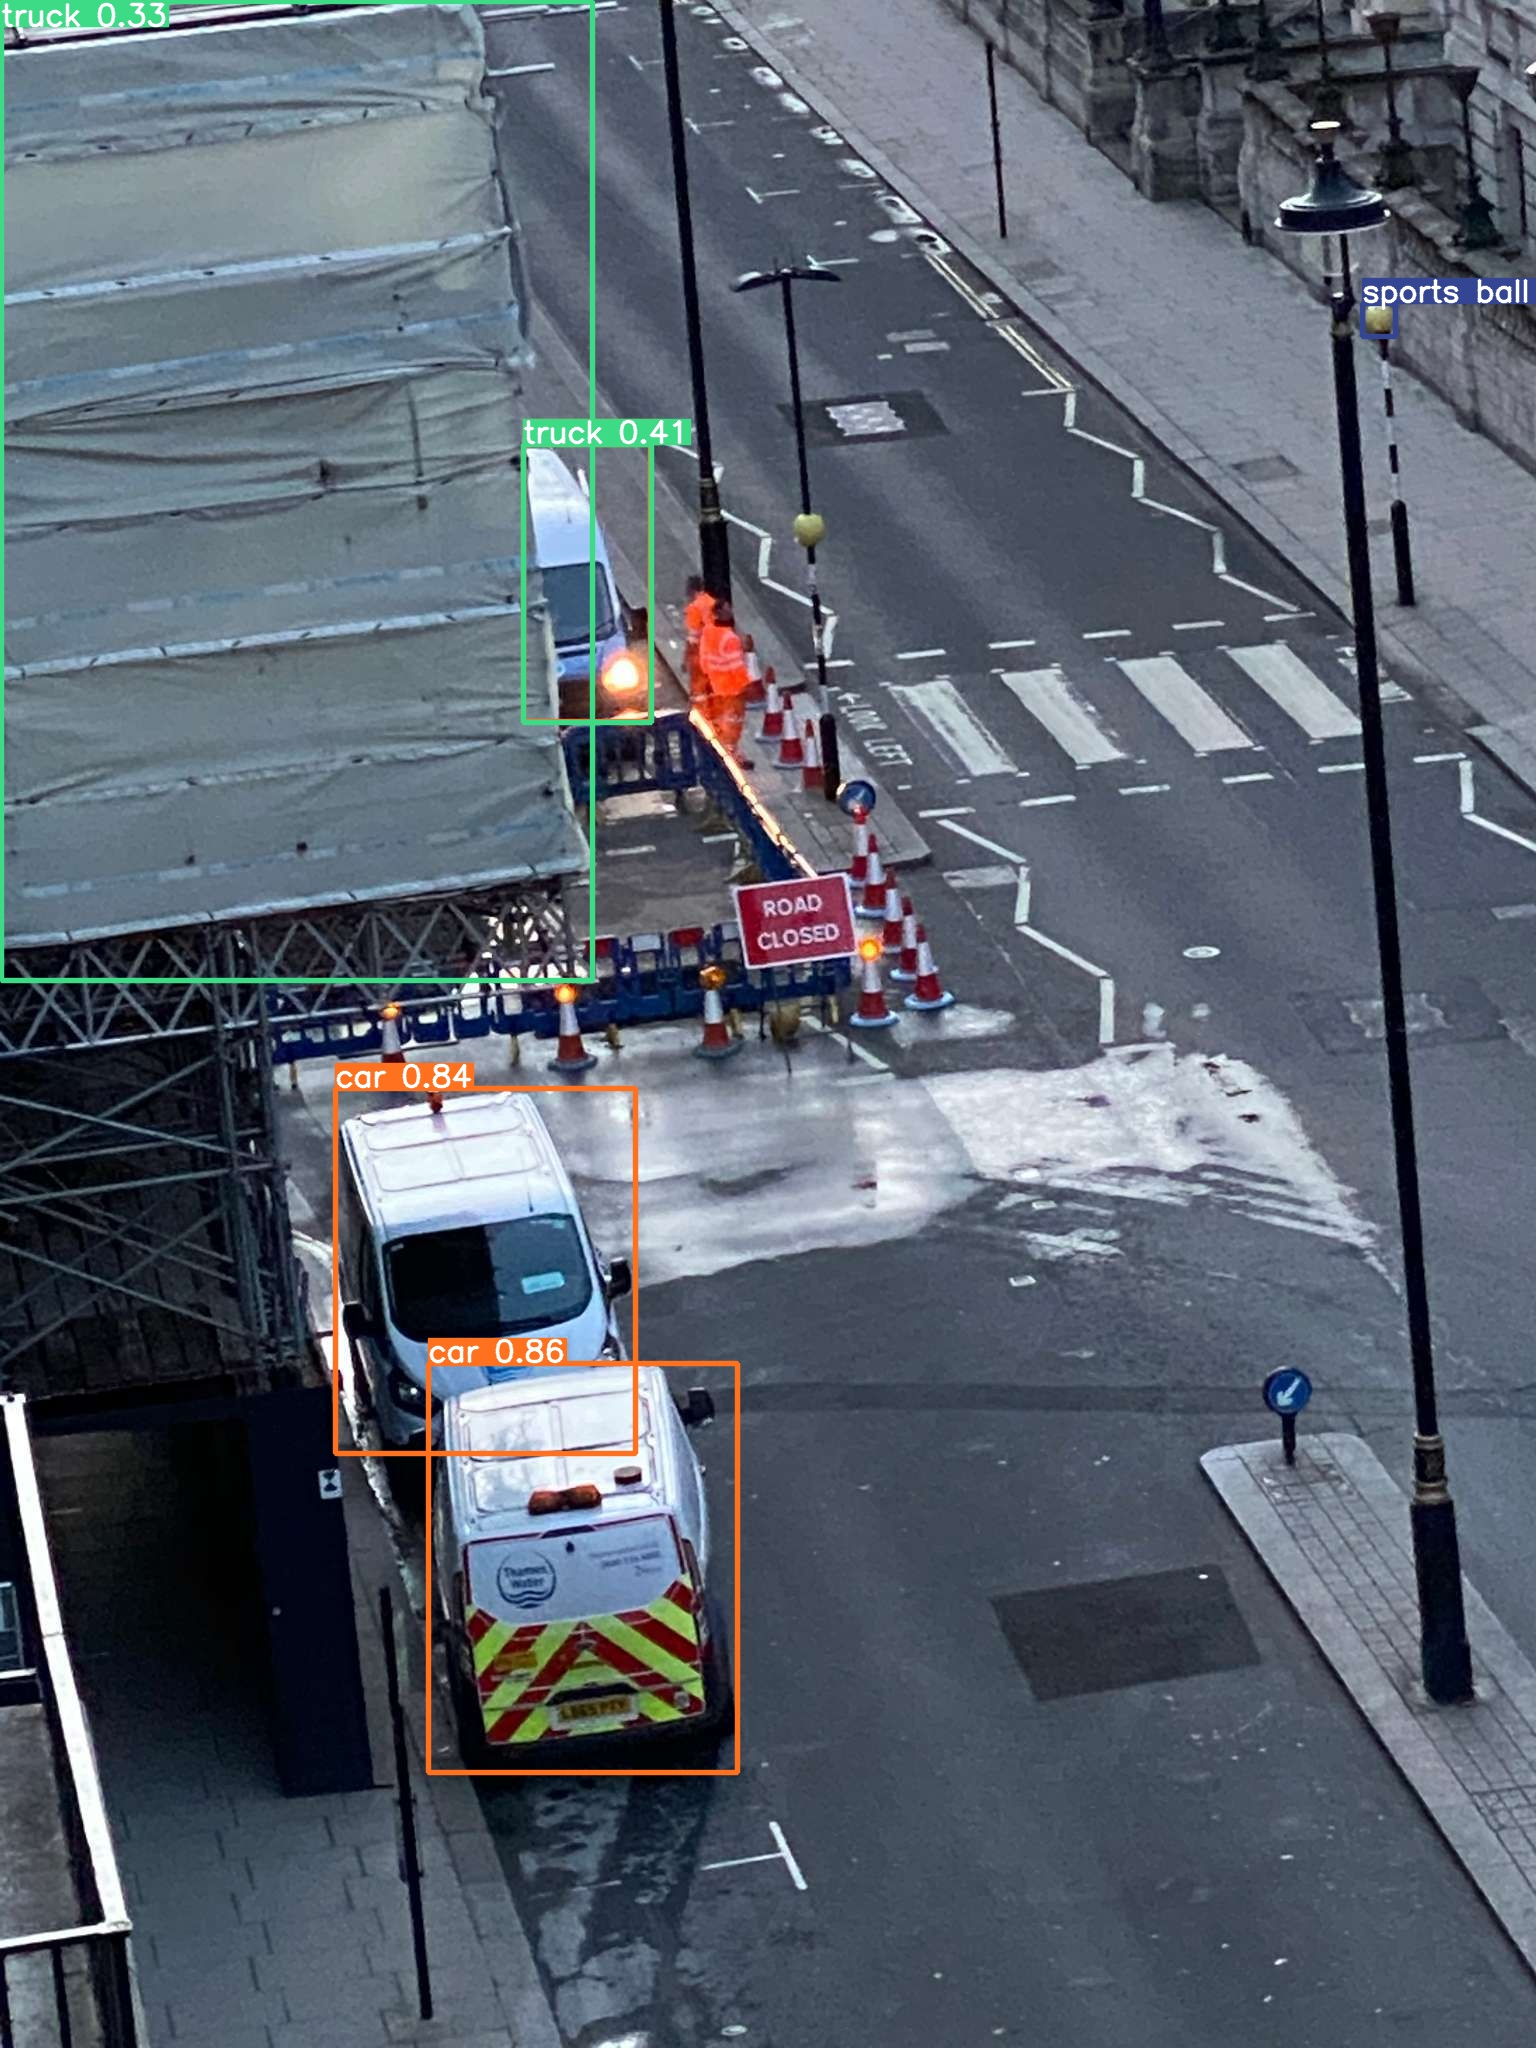

In [52]:
Image(filename=f"{HOME}/yolov9/yolov9/runs/detect/exp5/{SOURCE_IMAGE_PATH}", width=600)

## yolov9-e

In [42]:
#!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source /content/yolov9/Screenshot_70.png --device 0

!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source $SOURCE_IMAGE_PATH --device cpu


detect: weights=['/content/weights/yolov9-e.pt'], source=https://upload.wikimedia.org/wikipedia/commons/3/3f/Walking_tiger_female.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
Found https://upload.wikimedia.org/wikipedia/commons/3/3f/Walking_tiger_female.jpg locally at Walking_tiger_female.jpg
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /content/yolov9/yolov9/Walking_tiger_female.jpg: 384x640 1 zebra, 3671.6ms
Speed: 2.7ms pre-process, 3671.6ms inference, 6.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/de

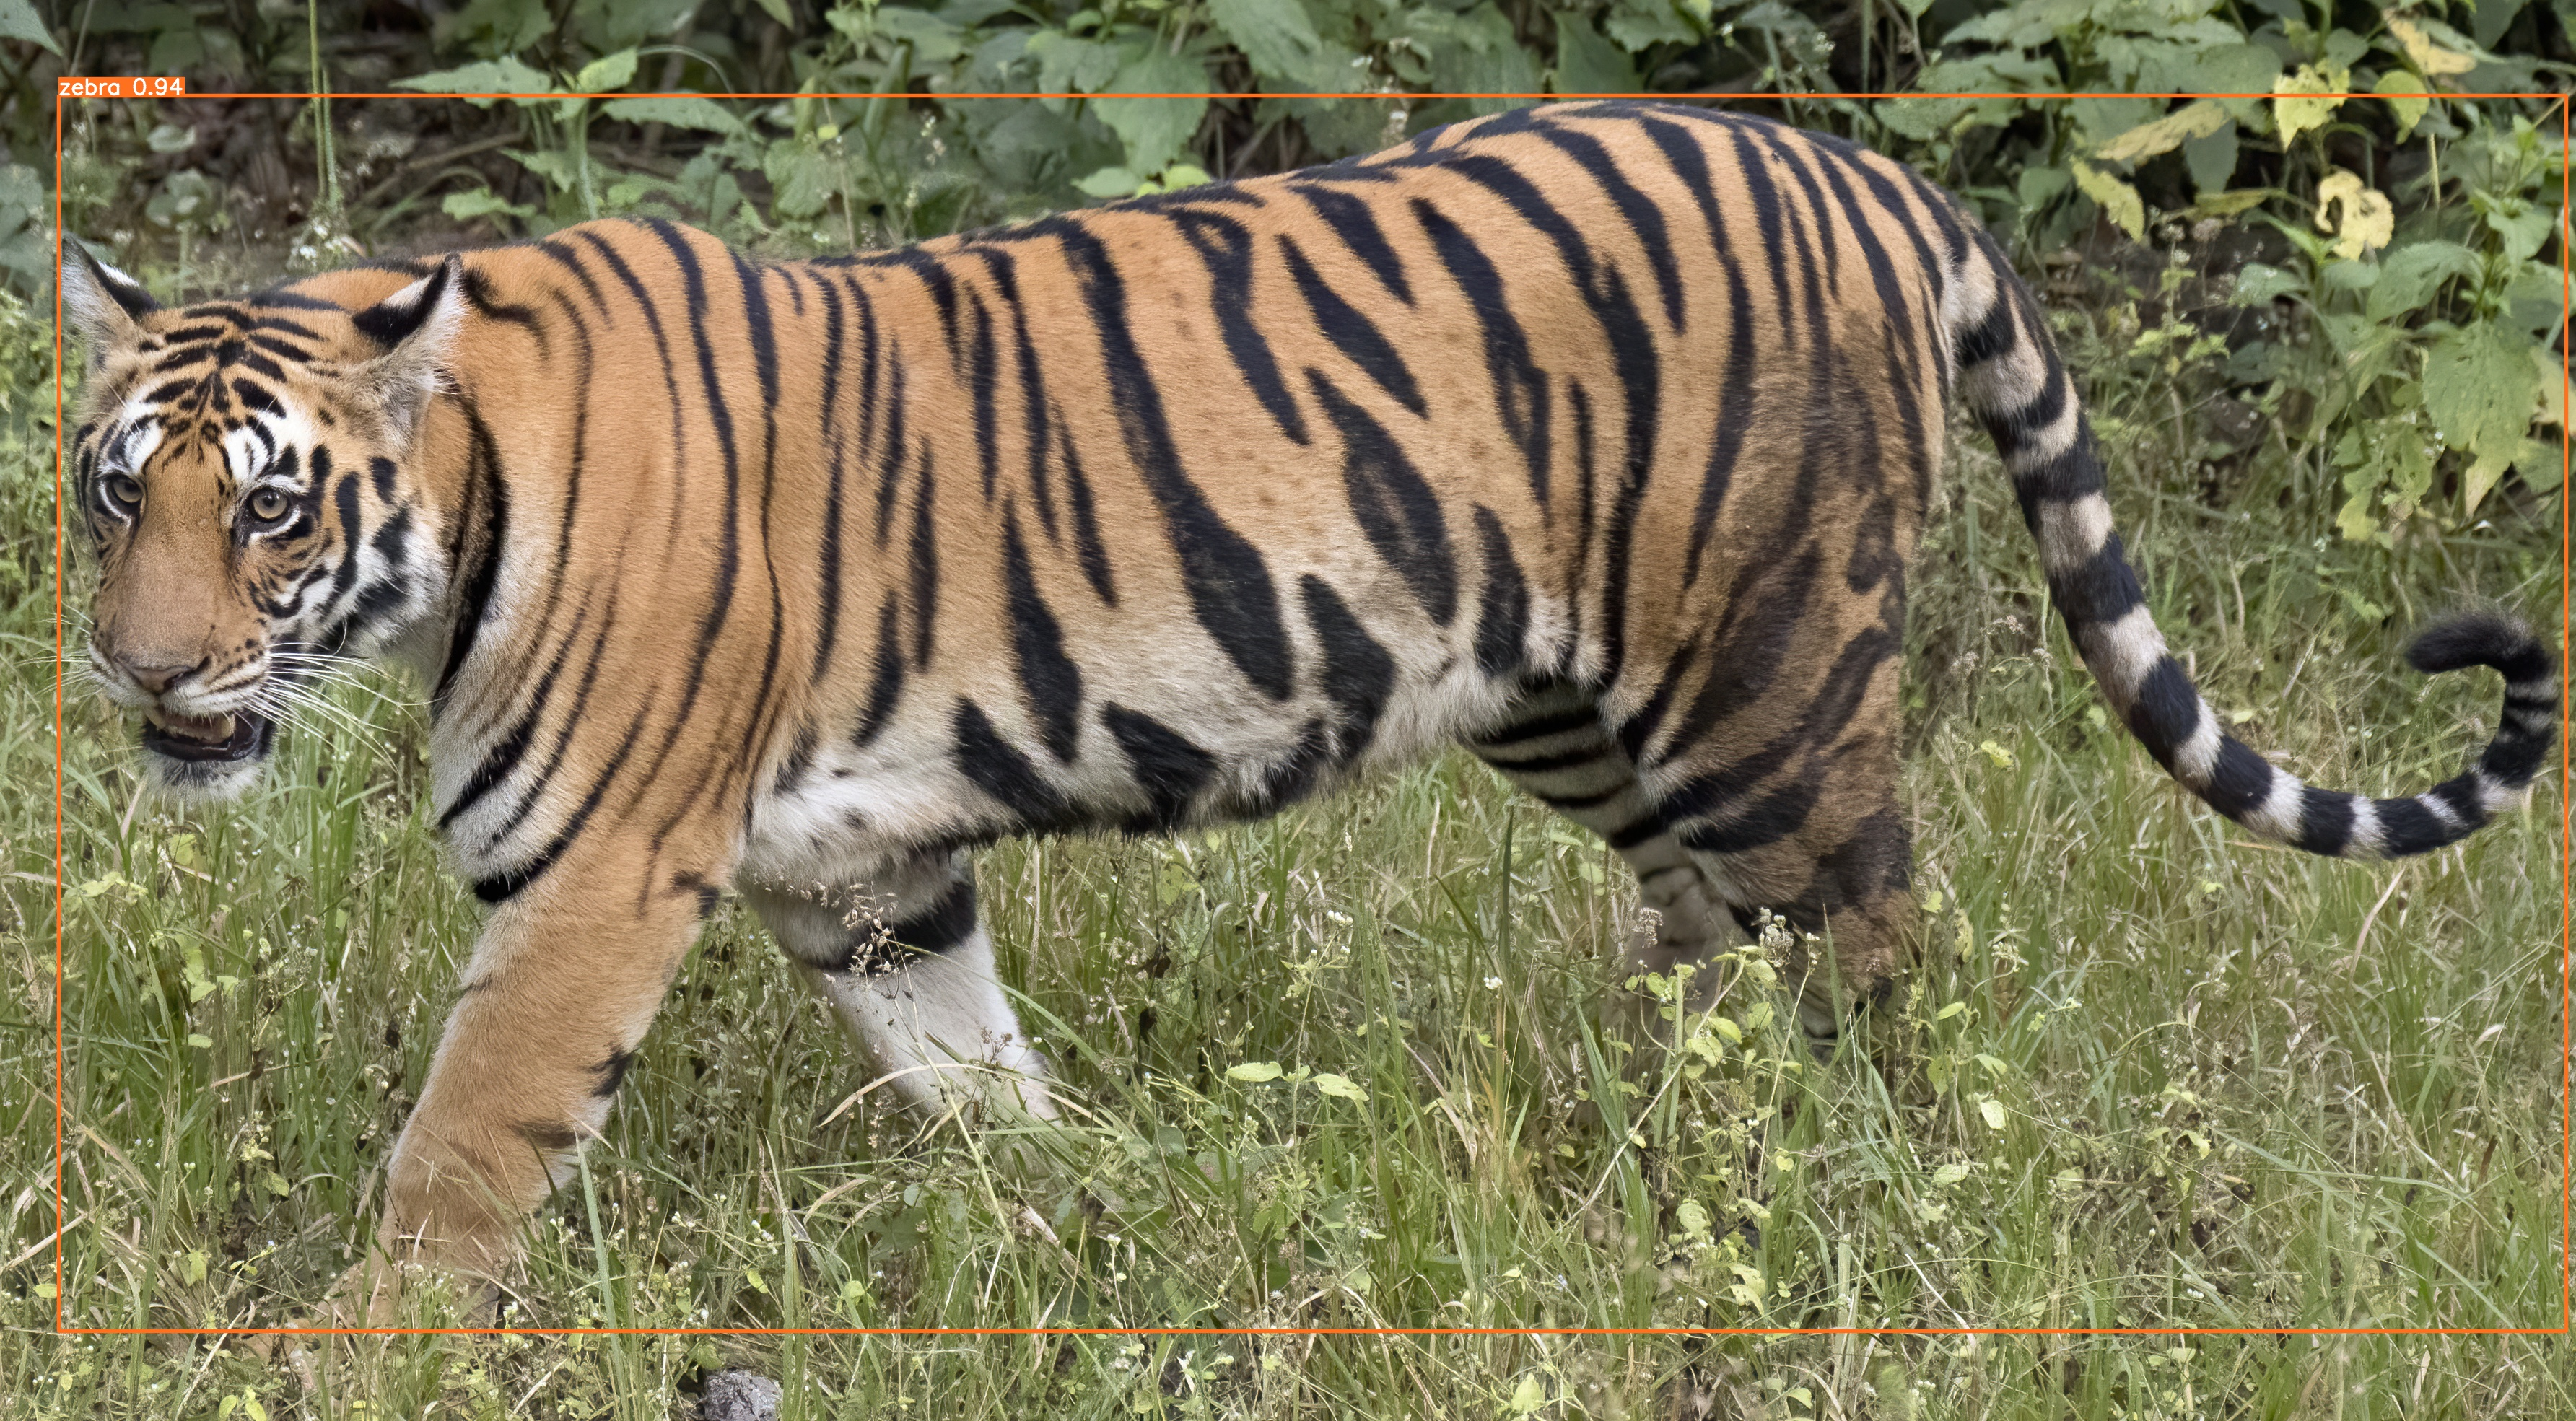

In [45]:
Image(filename=f"{HOME}/yolov9/yolov9/runs/detect/exp2/Walking_tiger_female.jpg", width=600)

## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [53]:
%cd {HOME}/yolov9


from roboflow import Roboflow
rf = Roboflow(api_key="lhE9fWdslhOTrKklLwJ2")
project = rf.workspace("westminster-city-council-rk0d9").project("report-it-highways")
dataset = project.version(1).download("yolov9")



/content/yolov9
loading Roboflow workspace...
loading Roboflow project...


RuntimeError: {'error': 'yolov9 is an invalid format for project type multilabel-classification. Please use one of: multiclass, folder, clip.'}

## Train Custom Model

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 8 --epochs 10 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-02-25 09:14:08.700749: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-25 09:14:08.700798: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-25 09:14:08.702177: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-25 09:14:09.809496: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/Cup-Detection-v2-3/data.yaml, hyp=hyp.scratch-high.yaml, epochs=10, batch_size=8, imgsz=640, rect=False, resume=False, nosave=Fa

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
!ls {HOME}/yolov9/runs/train/exp/

events.out.tfevents.1708852291.3e49c9daf62d.704.0  hyp.yaml  opt.yaml  weights


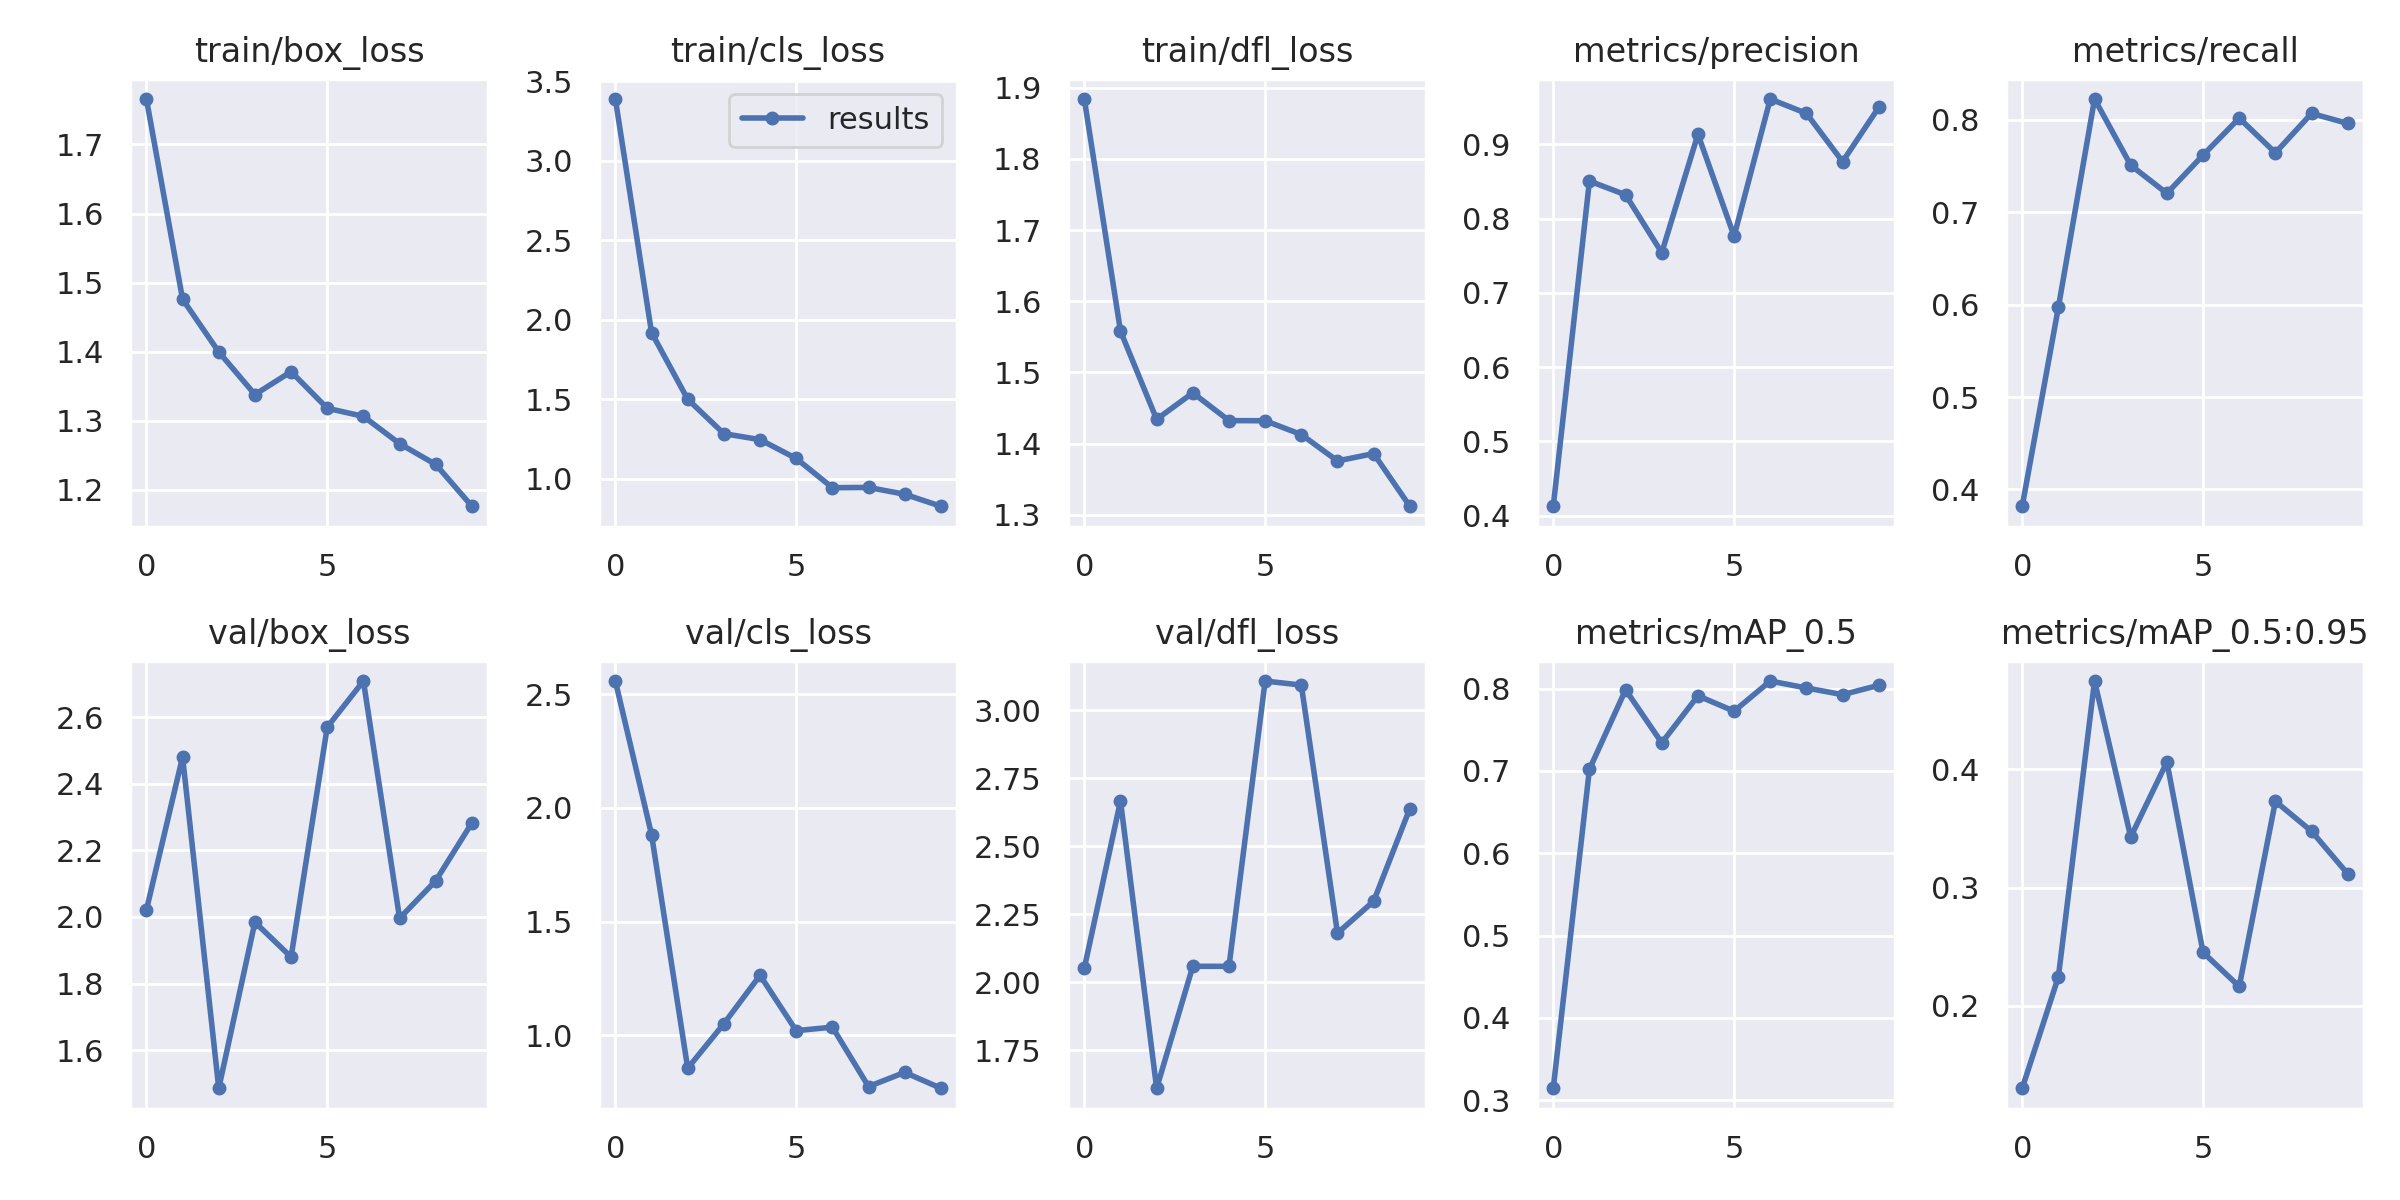

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/train/exp3/results.png", width=1000)

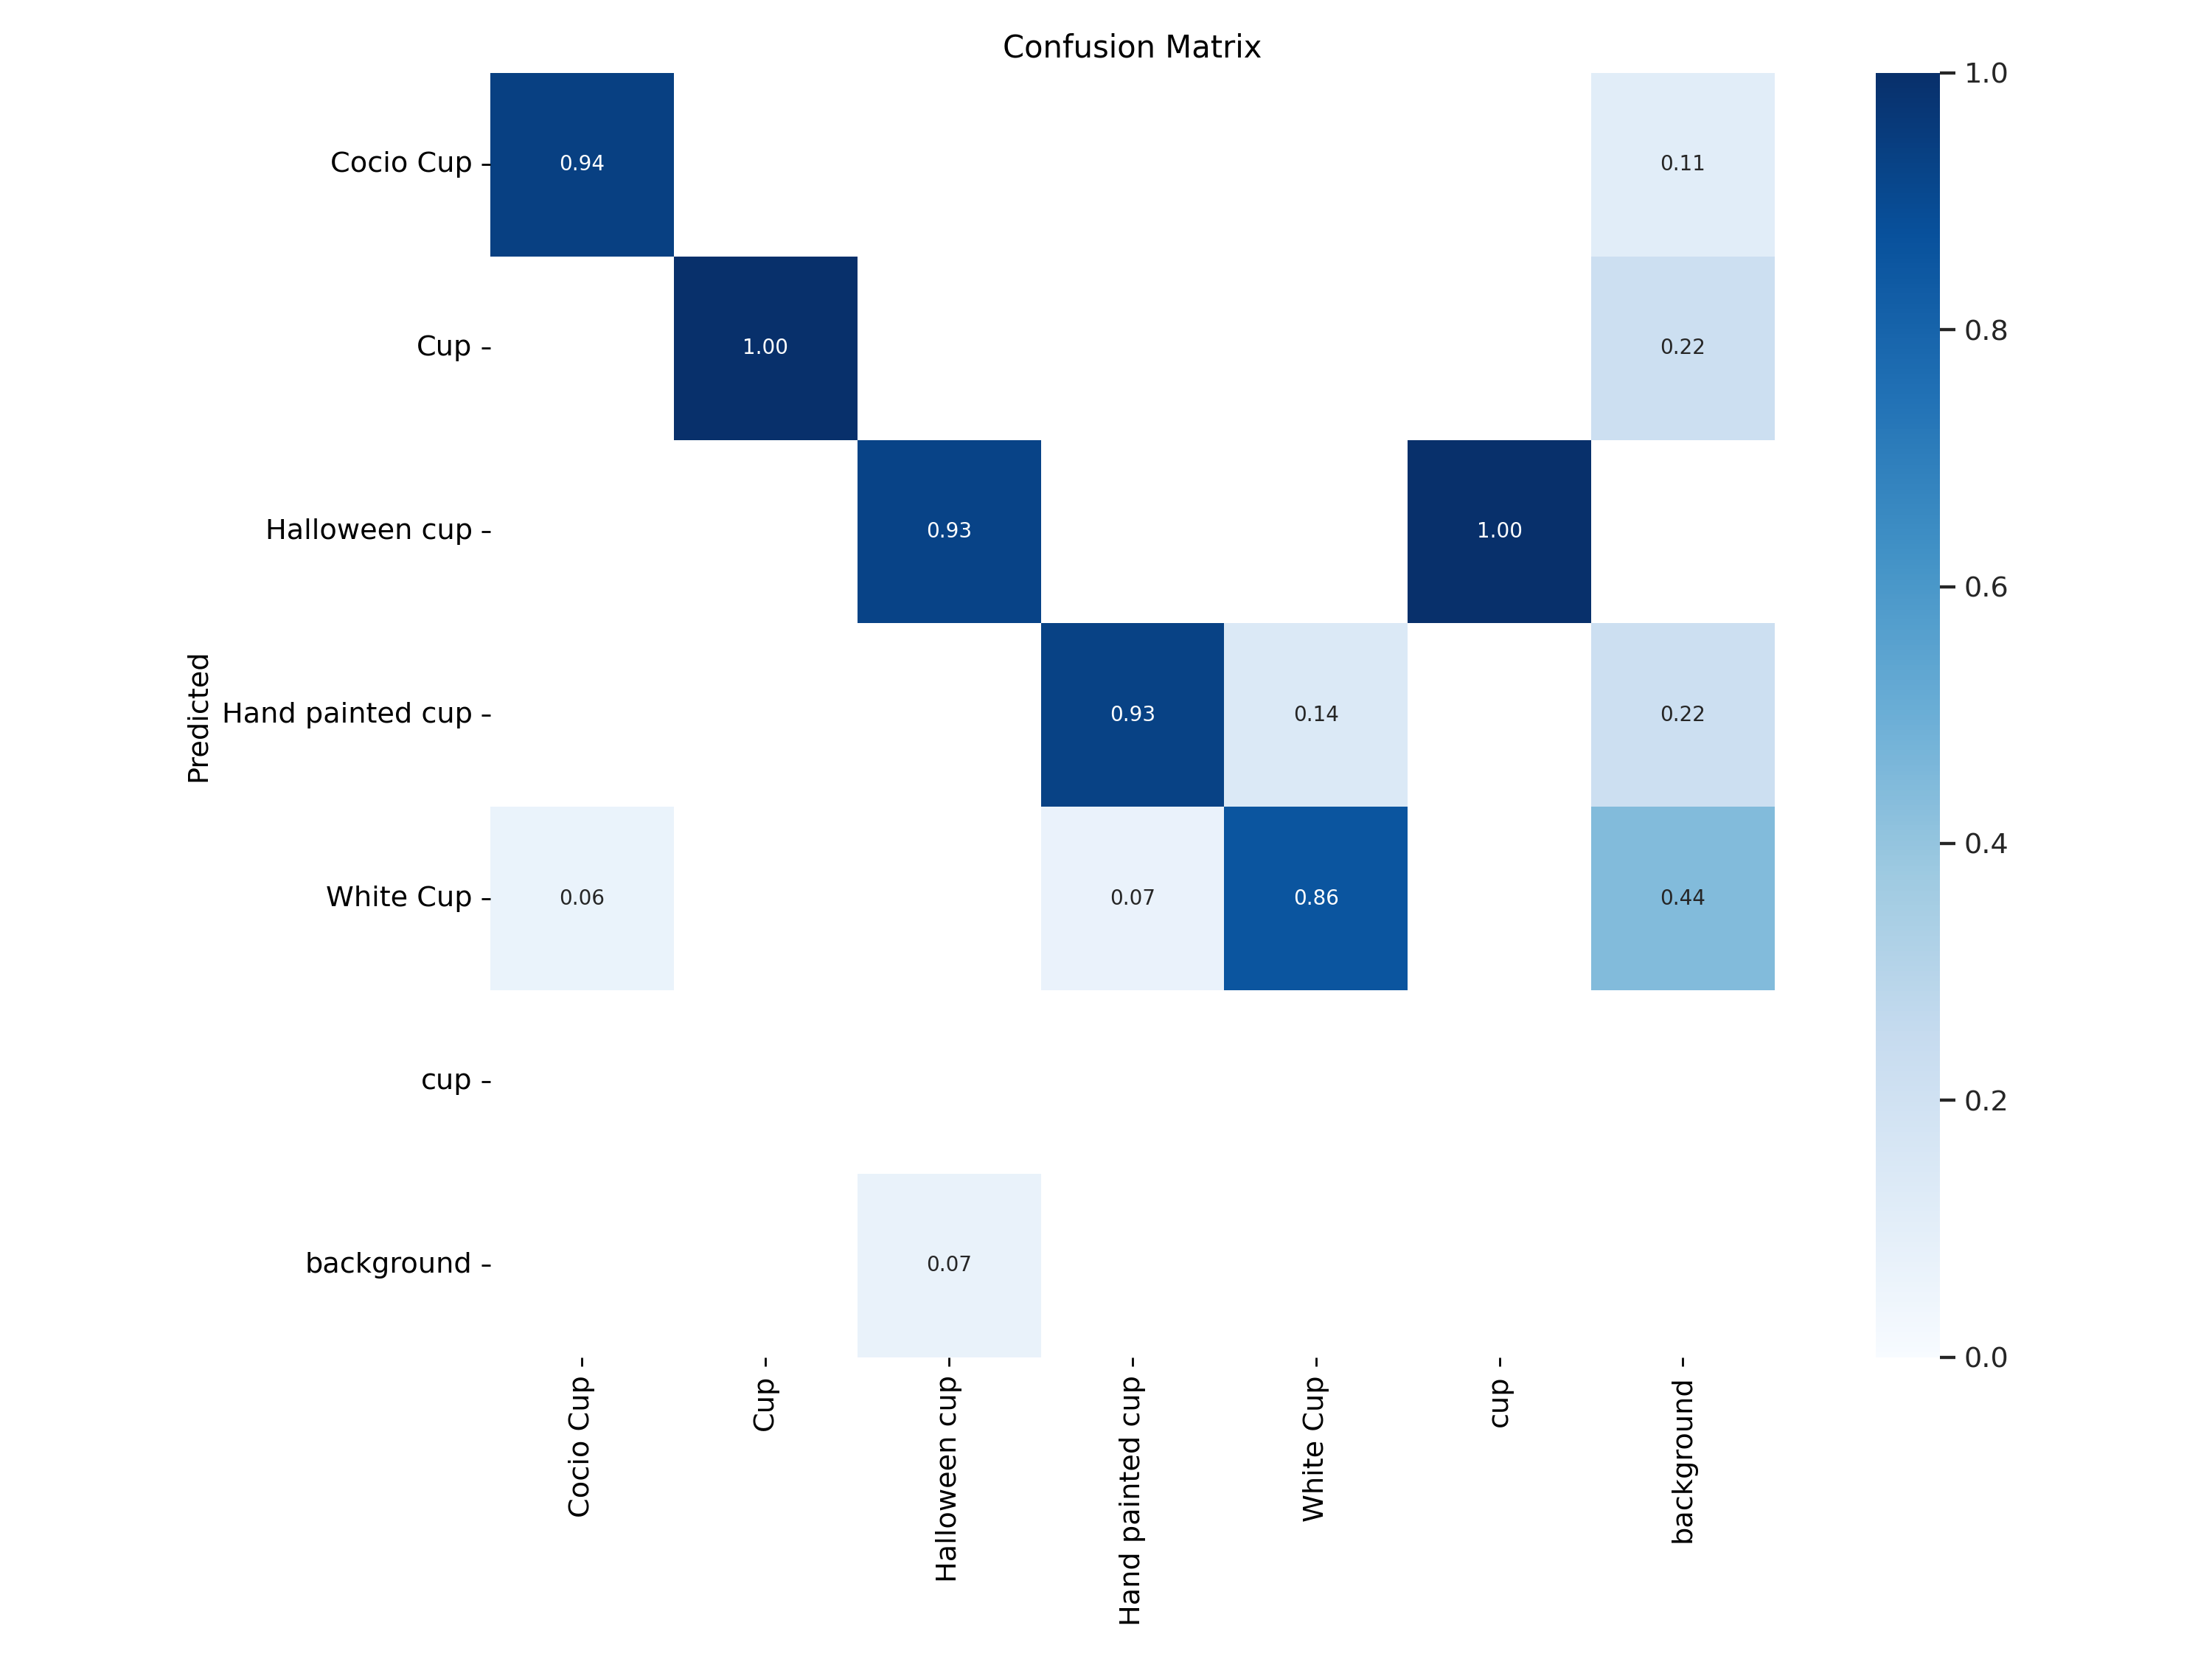

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/train/exp3/confusion_matrix.png", width=1000)

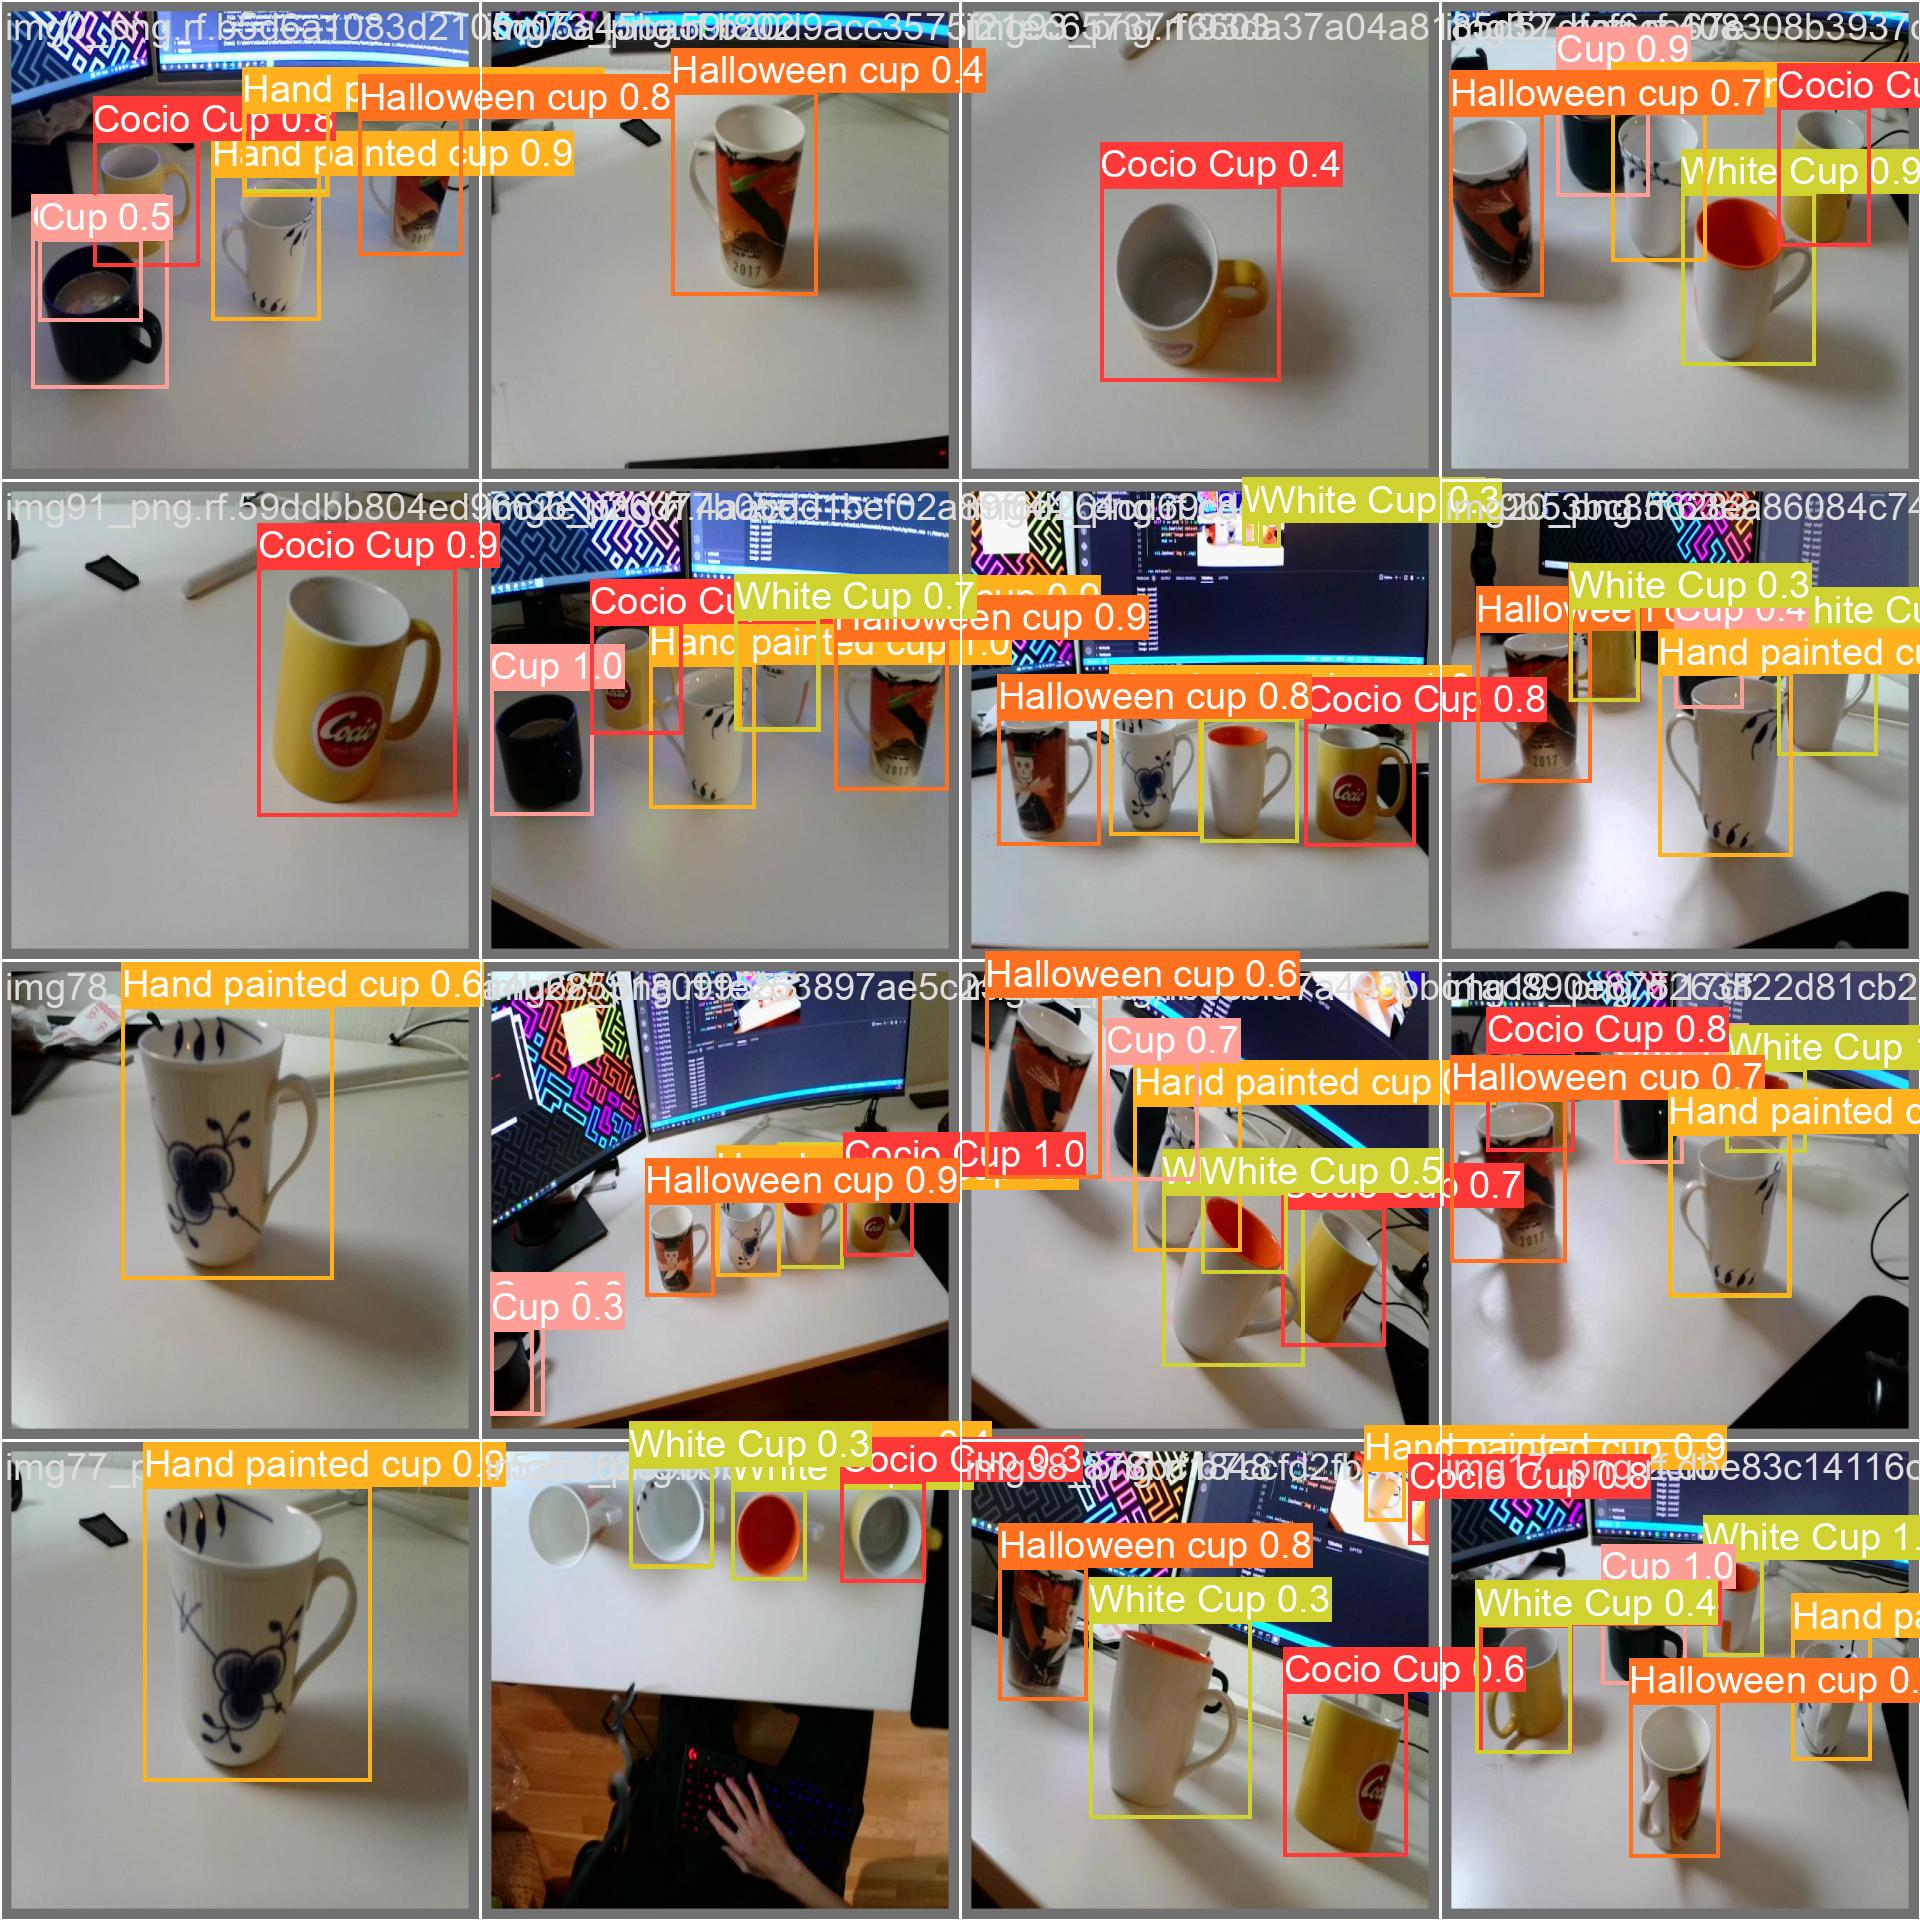

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/train/exp3/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp3/weights/best.pt

/content/yolov9
val: data=/content/yolov9/Cup-Detection-v2-3/data.yaml, weights=['/content/yolov9/runs/train/exp3/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25415586 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/Cup-Detection-v2-3/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:02<00:00,  1.07it/s]
                   all         19         71      0.832      0.822      0.799      0.475
             Cocio Cup         19         16   

## Inference with Custom Model

In [ ]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp3/weights/best.pt \
--source {dataset.location}/valid/images

detect: weights=['/content/yolov9/runs/train/exp3/weights/best.pt'], source=/content/yolov9/Cup-Detection-v2-3/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25415586 parameters, 0 gradients, 102.5 GFLOPs
image 1/19 /content/yolov9/Cup-Detection-v2-3/valid/images/img0_png.rf.b5d6a1083d2105c05a45ba59f8022d20.jpg: 640x640 1 Cocio Cup, 2 Cups, 1 Halloween cup, 3 Hand painted cups, 1 White Cup, 51.7ms
image 2/19 /content/yolov9/Cup-Detection-v2-3/valid/images/img13_png.rf.3463eddcd82fbc295b4fb72e2795790e.jpg: 6

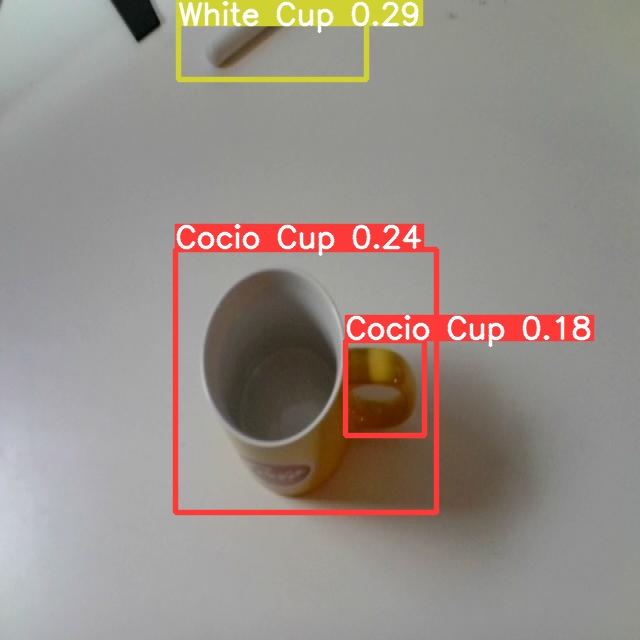

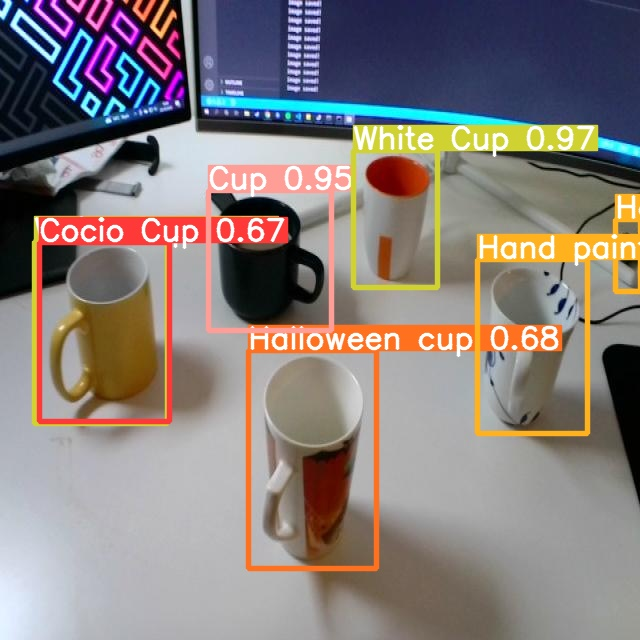

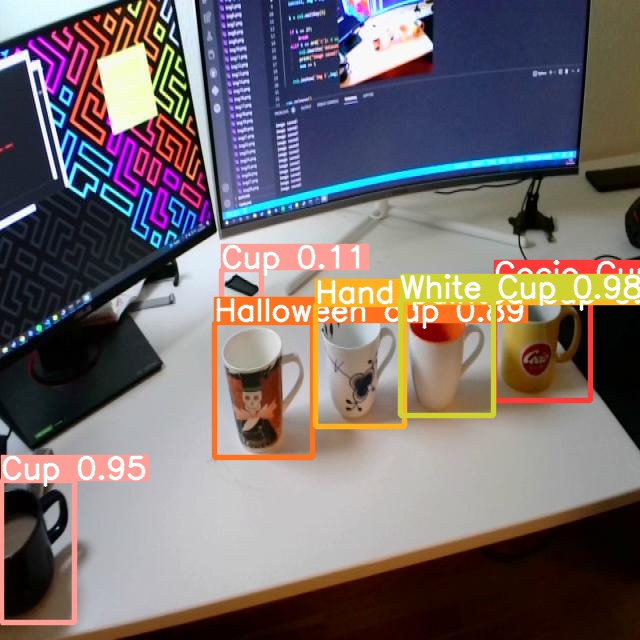

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")